# Final Project Submission 
# Garima Mathur

**UCID:gm47**

---
# Setup and Data Processing

In [ ]:
import numpy as np
from sklearn.datasets import make_moons


import matplotlib.pyplot as plt

def data(n_samples = 100, seed = 123, separable = True):
    
    np.random.seed(seed)

    if separable == True: # separable
        # genrate points using Gaussian distributions
        p1 = np.random.multivariate_normal([0, 0], [[1, .95],[.95, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 4], [[1, .65],[.65, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), np.zeros(n_samples)))  

    else: # nonseparable
        p1 = np.random.multivariate_normal([0, 0], [[1, .55],[.55, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 2.5], [[1, .55],[.55, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), np.zeros(n_samples)))  
    return X,Y

---
#Importing all required libraries 

In [ ]:
import math
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from keras import metrics
from tensorflow import keras
from tensorflow.keras import layers
import warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

---
#Training and Testing of the Models -

# Separating  testing and training datasets

Plotting testing and training datasets to see the distribution 



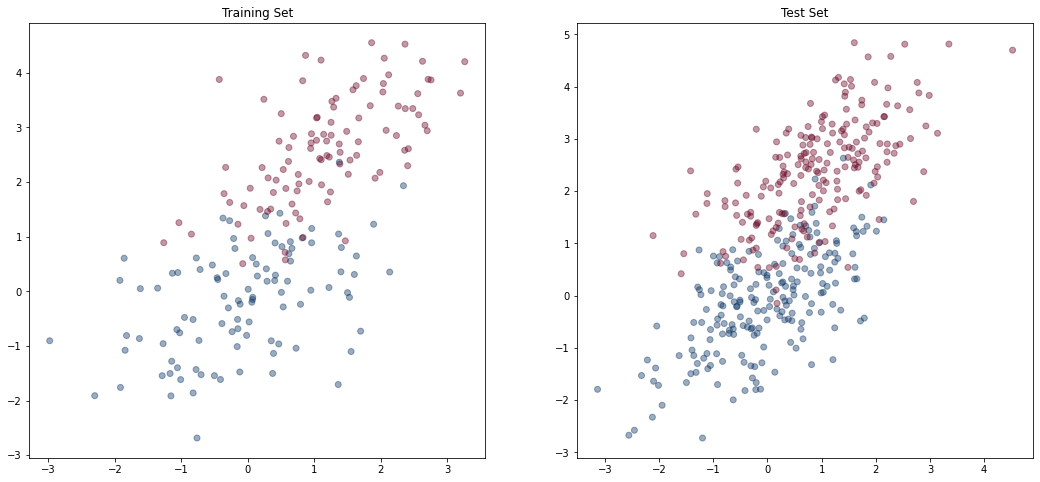

In [ ]:
X_train, Y_train = data(n_samples = 100, seed = 123 , separable=False)
X_test,  Y_test  = data(n_samples = 200, seed = 321,separable=False)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

# LSTM implementation :

In [ ]:
fp = 0
fn = 0
tp = 0
tn = 0
for i in range(1,11):
    model1 = keras.Sequential()
    model1.add(layers.LSTM(units = 5, return_sequences = True,input_shape= (X_train.shape[1],1)))
    model1.add(layers.LSTM(units = 5, return_sequences = True))
    model1.add(Dropout(0.2))
    model1.add(Dense(units = 1))
    model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[['accuracy' , 'mse']])
    model1.fit(X_train, Y_train)
    X_test1=X_test.reshape(2,1)
    prediction_rm=model1.predict(X_test1)
    for X_test1, prediction_rm in zip(X_test1, prediction_rm):
      if prediction_rm.any() == X_test1.any():
          if prediction_rm.any() == 1:
              tp += 1
          else: 
              tn += 1
      else: 
          if prediction_rm.any() == 1:
              fp += 1
          else:
              fn += 1           
    our_confusion_matrix = [
        [tn, fp],
        [fn, tp]
    ]
    print("iteration :", i)
    print(our_confusion_matrix)

7/7 [==============================] - 4s 6ms/step - loss: 0.4717 - accuracy: 0.5000 - mse: 0.4717
iteration : 1
[[0, 0], [0, 2]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4988 - accuracy: 0.5000 - mse: 0.4988
iteration : 2
[[0, 0], [0, 4]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4908 - accuracy: 0.5000 - mse: 0.4908
iteration : 3
[[0, 0], [0, 6]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4820 - accuracy: 0.5000 - mse: 0.4820
iteration : 4
[[0, 0], [0, 8]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4934 - accuracy: 0.5000 - mse: 0.4934
iteration : 5
[[0, 0], [0, 10]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4818 - accuracy: 0.5000 - mse: 0.4818
iteration : 6
[[0, 0], [0, 12]]
7/7 [==============================] - 4s 6ms/step - loss: 0.4932 - accuracy: 0.5000 - mse: 0.4932
iteration : 7
[[0, 0], [0, 14]]
7/7 [==============================] - 5s 6ms/step - loss: 0.5037 - accuracy: 0.5000 - 

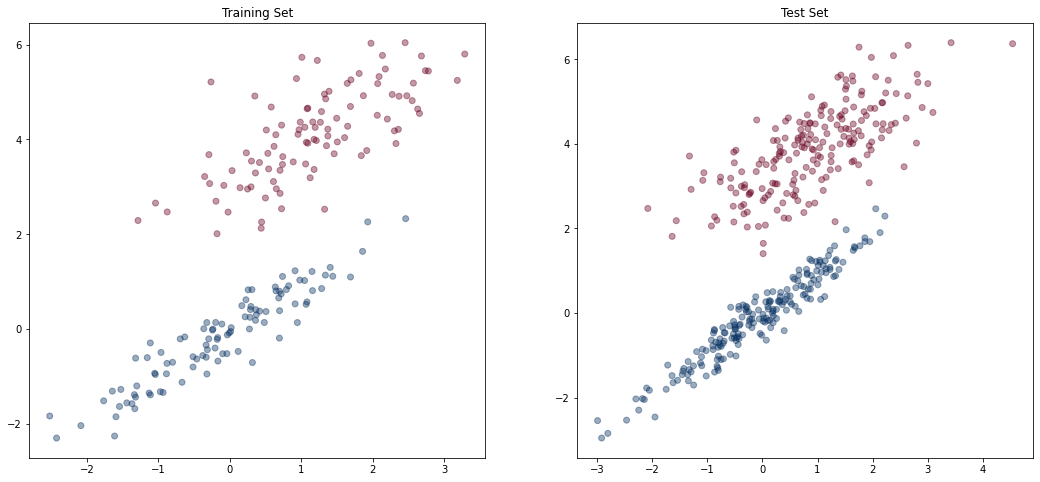

In [ ]:
X_train, Y_train = data(n_samples = 100, seed = 123)
X_test,  Y_test  = data(n_samples = 200, seed = 321)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

# Random Forest Implentation :

In [ ]:
total_score = 0.0
for i in range(1,11):
    model2 = RandomForestClassifier()
    model2.fit(X_train,Y_train)
    Y_logr_sck=model2.predict(X_test)
    accuracy_logr_sck = accuracy_score(Y_test.flatten(), Y_logr_sck)
    print("iteration :", i)
    print('Accuracy of The Random Forest :',accuracy_logr_sck)
    print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_logr_sck)) 
    total_score = total_score + accuracy_logr_sck
print("mean score :", (total_score/10)*100)


iteration : 1
Accuracy of The Random Forest : 0.9925
Confusion matrix:
 [[198   2]
 [  1 199]]
iteration : 2
Accuracy of The Random Forest : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 3
Accuracy of The Random Forest : 0.9925
Confusion matrix:
 [[198   2]
 [  1 199]]
iteration : 4
Accuracy of The Random Forest : 0.9875
Confusion matrix:
 [[197   3]
 [  2 198]]
iteration : 5
Accuracy of The Random Forest : 0.9925
Confusion matrix:
 [[198   2]
 [  1 199]]
iteration : 6
Accuracy of The Random Forest : 0.985
Confusion matrix:
 [[198   2]
 [  4 196]]
iteration : 7
Accuracy of The Random Forest : 0.9925
Confusion matrix:
 [[198   2]
 [  1 199]]
iteration : 8
Accuracy of The Random Forest : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 9
Accuracy of The Random Forest : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 10
Accuracy of The Random Forest : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
mean score : 99.02499999999999


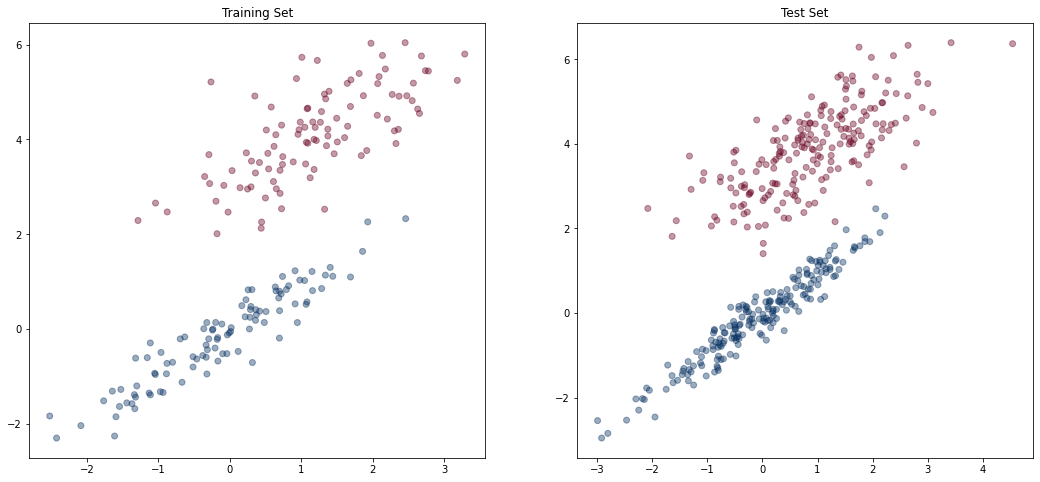

In [ ]:
X_train, Y_train = data(n_samples = 100, seed = 123)
X_test,  Y_test  = data(n_samples = 200, seed = 321)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

# Naive Baye's Implentation :

In [ ]:
total_score = 0.0
for i in range(1,11):
    model3 = GaussianNB()
    model3.fit(X_train, Y_train)
    Y_perc_sck = model3.predict(X_test)
    accuracy_perc_sck = accuracy_score(Y_test.flatten(), Y_perc_sck)
    print("iteration :", i)
    print('Accuracy of The Naive bayes :',accuracy_logr_sck)
    print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_logr_sck)) 
    total_score = total_score + accuracy_logr_sck
print("mean score :", (total_score/10)*100)

iteration : 1
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 2
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 3
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 4
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 5
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 6
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 7
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 8
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 9
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 10
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
mean score : 99.0


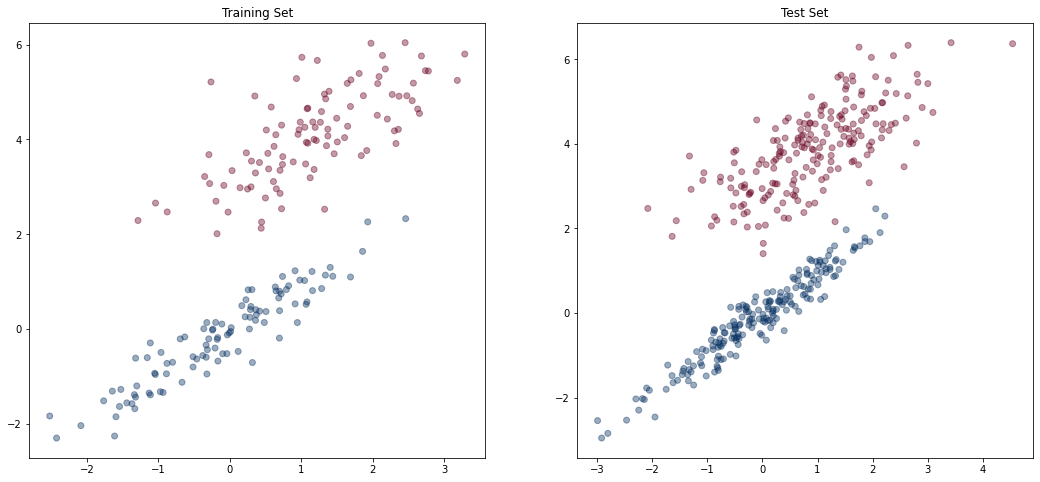

In [ ]:
X_train, Y_train = data(n_samples = 100, seed = 123)
X_test,  Y_test  = data(n_samples = 200, seed = 321)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

# Decision Tree Implentation :

In [ ]:
total_score = 0.0
for i in range(1,11):
    model4 = DecisionTreeClassifier()
    model4.fit(X_train, Y_train)
    Y_perc_sck = model4.predict(X_test)
    accuracy_perc_sck = accuracy_score(Y_test.flatten(), Y_perc_sck)
    print("iteration :", i)
    print('Accuracy of The Naive bayes :',accuracy_logr_sck)
    print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_logr_sck)) 
    total_score = total_score + accuracy_logr_sck
print("mean score :", (total_score/10)*100)

iteration : 1
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 2
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 3
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 4
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 5
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 6
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 7
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 8
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 9
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
iteration : 10
Accuracy of The Naive bayes : 0.99
Confusion matrix:
 [[198   2]
 [  2 198]]
mean score : 99.0
